<a href="https://colab.research.google.com/github/221sakshisharma/coursera-ML-work/blob/main/MultipleLinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install numpy
!pip install pandas
!pip install scikit-learn
!pip install matplotlib

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

# Loading Data

In [ ]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv"

In [ ]:
df = pd.read_csv(url)

In [ ]:
df.sample(5)

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
543,2014,INFINITI,QX60 HYBRID AWD,SUV - STANDARD,2.5,4,AV,X,8.8,8.2,8.5,33,196
599,2014,JEEP,WRANGLER UNLIMITED 4X4 (4-DOOR),SUV - SMALL,3.6,6,M6,X,15.0,11.4,13.4,21,308
341,2014,FIAT,500L TURBO,STATION WAGON - SMALL,1.4,4,M6,X,9.3,7.2,8.4,34,193
209,2014,CHEVROLET,EQUINOX AWD,SUV - SMALL,3.6,6,A6,E,19.8,13.6,17.0,17,272
463,2014,GMC,TERRAIN,SUV - SMALL,2.4,4,A6,X,10.5,7.3,9.1,31,209


#Understanding The Data

In [ ]:
df.columns

Index(['MODELYEAR', 'MAKE', 'MODEL', 'VEHICLECLASS', 'ENGINESIZE', 'CYLINDERS',
       'TRANSMISSION', 'FUELTYPE', 'FUELCONSUMPTION_CITY',
       'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB',
       'FUELCONSUMPTION_COMB_MPG', 'CO2EMISSIONS'],
      dtype='object')

In [ ]:
df.drop(['MODELYEAR', 'MAKE', 'MODEL', 'VEHICLECLASS', 'TRANSMISSION', 'FUELTYPE'], axis=1, inplace=True)

We must include the independent features that is those features which are not highly correlated

In [ ]:
df.corr()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
ENGINESIZE,1.000000,0.934011,0.832225,0.778746,0.819482,-0.808554,0.874154
CYLINDERS,0.934011,1.000000,0.796473,0.724594,0.776788,-0.770430,0.849685
FUELCONSUMPTION_CITY,0.832225,0.796473,1.000000,0.965718,0.995542,-0.935613,0.898039
FUELCONSUMPTION_HWY,0.778746,0.724594,0.965718,1.000000,0.985804,-0.893809,0.861748
FUELCONSUMPTION_COMB,0.819482,0.776788,0.995542,0.985804,1.000000,-0.927965,0.892129
FUELCONSUMPTION_COMB_MPG,-0.808554,-0.770430,-0.935613,-0.893809,-0.927965,1.000000,-0.906394
CO2EMISSIONS,0.874154,0.849685,0.898039,0.861748,0.892129,-0.906394,1.000000


We can observe that:
* Fuel Consumption (Combined) > Fuel Consumption (City) > Engine Size > Fuel Consumption (Highway) > Cylinders

* Fuel Consumption (Combined MPG) is strongly negatively correlated with fuel Consumption (Combined) and hence only one of them can be included as a feature. Combined is directly propotional to CO2 Emissions whereas MPS is inversely propotional to it making itself non-linear.

* Due to high multicollinearity among Combined, City, and Highway fuel consumption, only Combined fuel consumption will be used.

* Between Engine Size and Cylinders, only Engine Size will be used as it's more correlated with CO2 Emissions.

In [ ]:
df.drop(['CYLINDERS', 'FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB_MPG'], axis=1, inplace=True)

In [ ]:
df.head()

,ENGINESIZE,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,8.5,196
1,2.4,9.6,221
2,1.5,5.9,136
3,3.5,11.1,255
4,3.5,10.6,244


###Visualising The Data



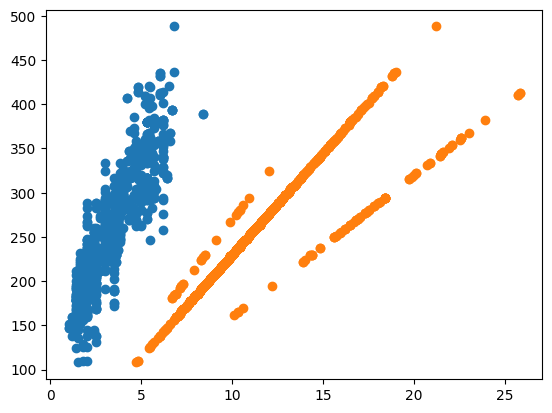

In [ ]:
plt.scatter(df.ENGINESIZE, df.CO2EMISSIONS)
plt.scatter(df.FUELCONSUMPTION_COMB, df.CO2EMISSIONS)

A Pair Plot or Scatterplot Matrix. It’s a visualization that explores relationships between multiple numerical variables — both distributions and correlations.


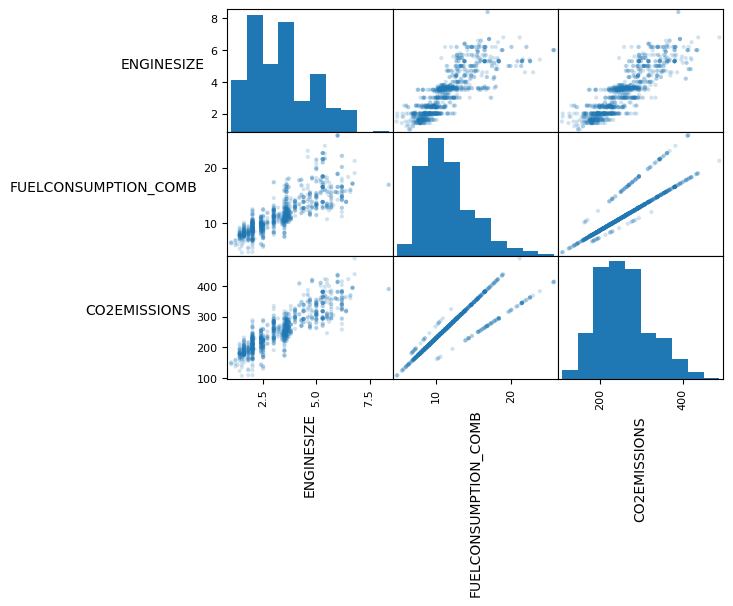

In [ ]:
axes = pd.plotting.scatter_matrix(df, alpha=0.2)

for ax in axes.flatten():
  ax.yaxis.label.set_rotation(0)
  ax.xaxis.label.set_rotation(90)
  ax.yaxis.label.set_ha('right')

# Engine Size and Combined Fuel Consumption as Input Features

## Extracting Input Features and labels from the Dataset

In [ ]:
X = df.iloc[:, [0, 1]].to_numpy()
y = df["CO2EMISSIONS"].to_numpy()

##Preprocessing the Data

In [ ]:
from sklearn import preprocessing

Scikit-Learn provides modules for preprocessing:
* Scaling (standardization/normalization)

* Encoding (turning categories into numbers)

* Imputation (filling in missing values)

* Binarization, polynomial features, etc.



In [ ]:
std_scaler = preprocessing.StandardScaler()

standardized_value = (actual_value - mean) / standard_deviation

In [ ]:
X = std_scaler.fit_transform(X)

In [ ]:
X

array([[-0.9512918 , -0.88430407],
       [-0.66865251, -0.5685715 ],
       [-1.30459092, -1.63058106],
       ...,
       [-0.24469358,  0.06289365],
       [-0.10337393, -0.08062116],
       [-0.10337393,  0.34992326]])

In [ ]:
std_scaler.mean_

array([ 3.34629803, 11.58088097])

In [ ]:
np.sqrt(std_scaler.var_)

array([1.4152314, 3.4839611])

## Splitting the Data into Training and Test Data

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
np.shape(X_train)

(853, 2)

In [ ]:
np.shape(X_test)

(214, 2)

## Building a Multiple Linear Regression Model

[Scikit-learn Linear Regression Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

In [ ]:
from sklearn import linear_model

##### Creating the model object

In [ ]:
regressor = linear_model.LinearRegression()

##### Training the model

In [ ]:
regressor.fit(X_train, y_train)

LinearRegression()

##### Printing the Coefficients

In [ ]:
coeff = regressor.coef_

In [ ]:
coeff

array([27.72838436, 33.51026855])

In [ ]:
intercept = regressor.intercept_

In [ ]:
intercept

np.float64(256.55856797792757)

#####Visualising the Trained Model

Text(0, 0.5, 'CO2 Emissions')

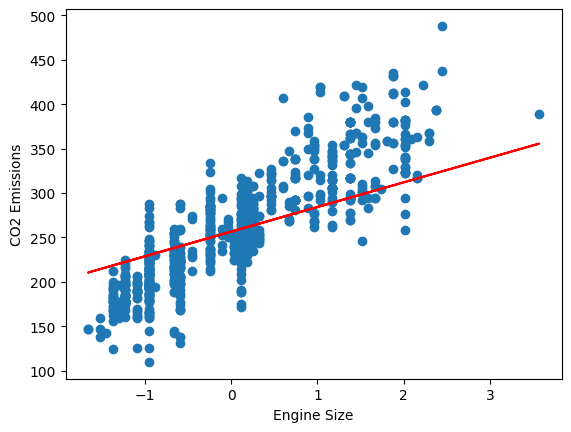

In [ ]:
plt.scatter(X_train[:, 0], y_train)
plt.plot(X_train[:, 0], X_train[:, 0]*coeff[0] + intercept, '-r')
plt.xlabel("Engine Size")
plt.ylabel("CO2 Emissions")

Text(0, 0.5, 'CO2 Emissions')

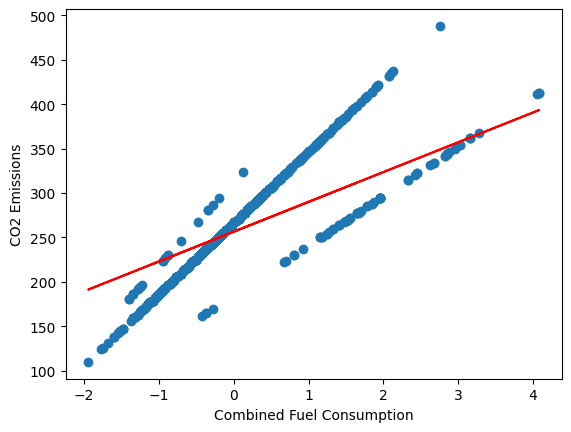

In [ ]:
plt.scatter(X_train[:, 1], y_train)
plt.plot(X_train[:, 1], X_train[:, 1]*coeff[1] + intercept, '-r')
plt.xlabel("Combined Fuel Consumption")
plt.ylabel("CO2 Emissions")

## Model Evaluation

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
y_pred = regressor.predict(X_test)

In [ ]:
mean_absolute_error(y_test, y_pred)

17.033750729900497

In [ ]:
np.sqrt(mean_squared_error(y_test, y_pred))

np.float64(23.314755198699114)

In [ ]:
r2_score(y_test, y_pred)

0.8685405139405122